In [1]:
import pandas as pd
import seaborn as sns

In [12]:
df=pd.read_csv("titanic_train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df["Age"].isnull().sum()

177

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

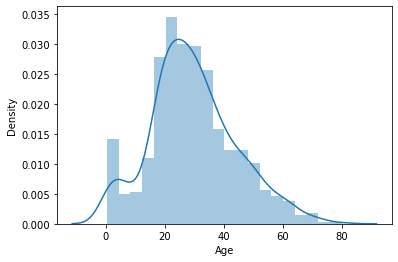

In [6]:
sns.distplot(df["Age"].dropna())

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

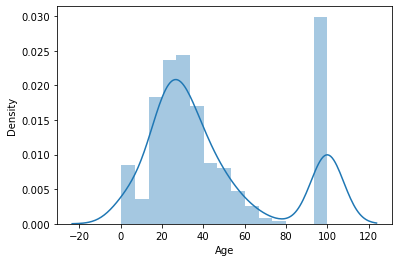

In [7]:
sns.distplot(df["Age"].fillna(100))

#### Gaussian Distributed Data

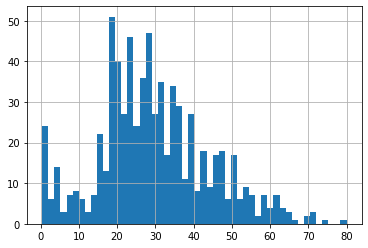

In [8]:
figure=df.Age.hist(bins=50)

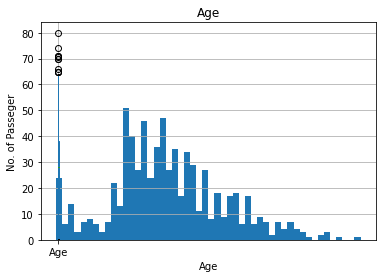

In [9]:
figure=df.Age.hist(bins=50)     ### Histogram
figure.set_title("Age")
figure.set_xlabel("Age")
figure.set_ylabel("No. of Passeger")
figure=df.boxplot(column="Age")   ### Boxplot

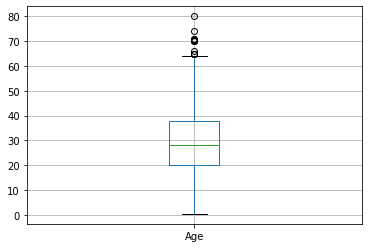

In [10]:
figure=df.boxplot(column="Age")

In [11]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [17]:
upper_boundary=df["Age"].mean()+3*df["Age"].std()

In [18]:
lower_boundary=df["Age"].mean()-3*df["Age"].std()

In [19]:
print(upper_boundary)
print(lower_boundary)

80.54185831022798
-21.143623016110332


In [20]:
print(df["Age"].mean())

29.69911764705882


#### If features are skewed

Text(0, 0.5, 'No. of Passeger')

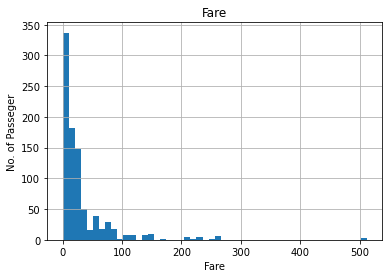

In [21]:
figure=df.Fare.hist(bins=50)     ### Histogram
figure.set_title("Fare")
figure.set_xlabel("Fare")
figure.set_ylabel("No. of Passeger")

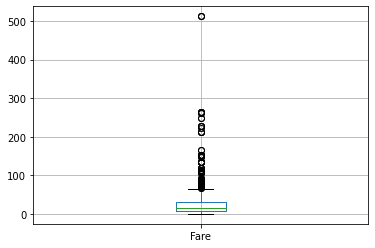

In [22]:
figure=df.boxplot(column="Fare")

In [23]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [24]:
IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)

In [25]:
IQR

23.0896

In [26]:
lower_fence=df["Fare"].quantile(0.25)-(IQR*1.5)
upper_fence=df["Fare"].quantile(0.75)+(IQR*1.5)

In [27]:
print(lower_fence)
print(upper_fence)

-26.724
65.6344


In [28]:
lower_fence=df["Fare"].quantile(0.25)-(IQR*3)
upper_fence=df["Fare"].quantile(0.75)+(IQR*3)

In [29]:
print(lower_fence)
print(upper_fence)

-61.358399999999996
100.2688


In [37]:
data=df.copy()

In [31]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Dealing with outliers

In [38]:
data.loc[data["Age"]>=72, "Age"]=72
data.loc[data["Fare"]>=100, "Fare"]=100

Text(0, 0.5, 'No. of Passeger')

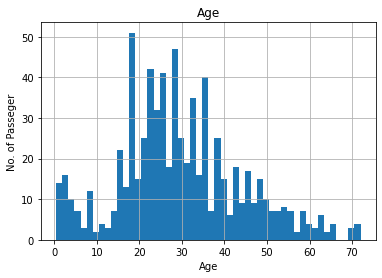

In [39]:
figure=data.Age.hist(bins=50)     ### Histogram
figure.set_title("Age")
figure.set_xlabel("Age")
figure.set_ylabel("No. of Passeger")

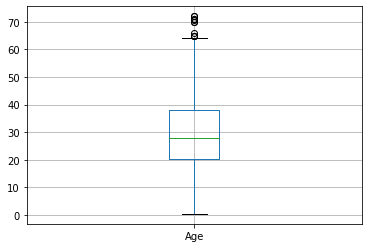

In [40]:
figure=data.boxplot(column="Age")   ### Boxplot

Text(0, 0.5, 'No. of Passeger')

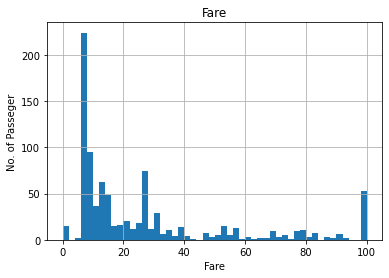

In [41]:
figure=data.Fare.hist(bins=50)     ### Histogram
figure.set_title("Fare")
figure.set_xlabel("Fare")
figure.set_ylabel("No. of Passeger")

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [43]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

In [44]:
## Accuracy
from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6865671641791045
roc_auc_score: 0.705024832018697
